### Test on ECG Data

The dataset you will use is based on one from [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).

Try to design and train your MLP to classify normal and abnormal ECG samples.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


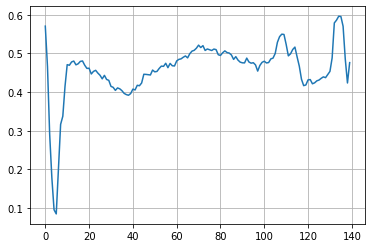

In [2]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=21)

# Normalize to [0, 1]
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

# plot data
plt.grid()
plt.plot(np.arange(140), train_data[0])
plt.show()

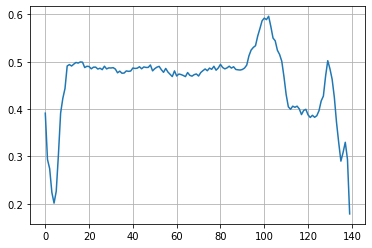

In [3]:
plt.grid()
plt.plot(np.arange(140), train_data[100])
plt.show()

# Data Exploration and Clustering

Size of training and testing with there class

In [4]:
print(np.unique(train_labels))
print((train_labels==0).sum())
print((train_labels==1).sum())
print(train_data.shape)
print(test_data.shape)

[0. 1.]
1639
2359
(3998, 140)
(1000, 140)


Setting random seeed for reproducable results

In [5]:
import random
random.seed(10)

## TSNE
Using TSNE to see how easily the classes can be seperated

In [6]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,random_state=21)
X=tsne.fit_transform(train_data)


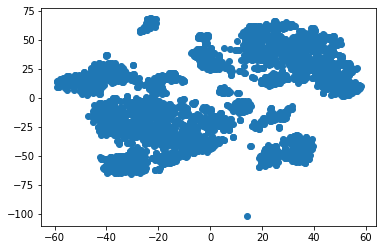

In [7]:
plt.scatter(X[:,0],X[:,1])

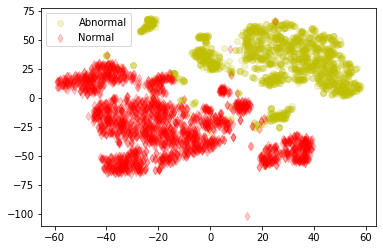

In [8]:
plt.scatter(X[np.where(train_labels==0),0],X[np.where(train_labels==0),1],marker='o',color='y',label='Abnormal',alpha=0.2)
plt.scatter(X[np.where(train_labels==1),0],X[np.where(train_labels==1),1],marker='d',color='r',label='Normal',alpha=0.2)
plt.legend(loc='best')

We can see from the above plot that we can easily seperate the class with high accuracy

# Model 
## Simple Neural Network
### 4 hidden layer Neural Network

In [9]:
model=tf.keras.Sequential([
    tf.keras.Input(shape=(140,)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')])
model.summary()
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               18048     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 28,657
Trainable params: 28,657
Non-trainable params: 0
_________________________________________________________________


In [10]:
history=model.fit(train_data,train_labels,batch_size=128,epochs=100,validation_split=0.2)

Epoch 1/100
25/25 [==============================] - 0s 18ms/step - loss: 0.6645 - accuracy: 0.5766 - val_loss: 0.6324 - val_accuracy: 0.5950
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5634 - accuracy: 0.7236 - val_loss: 0.4607 - val_accuracy: 0.9287
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3080 - accuracy: 0.9478 - val_loss: 0.2026 - val_accuracy: 0.9388
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1598 - accuracy: 0.9500 - val_loss: 0.1324 - val_accuracy: 0.9488
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1157 - accuracy: 0.9593 - val_loss: 0.1105 - val_accuracy: 0.9538
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0989 - accuracy: 0.9653 - val_loss: 0.0850 - val_accuracy: 0.9700
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0828 - accuracy: 0.9687 - val_loss: 0.0702 - val_accuracy: 0.9737
Epoch 8/100


Text(0.5, 1.0, 'Epoch vs Accuracy')

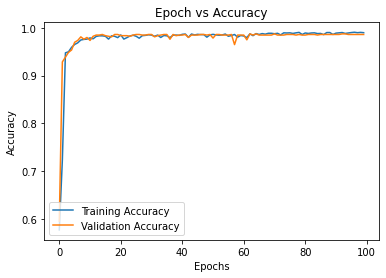

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy','Validation Accuracy'],loc='lower left')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Epoch vs Accuracy')

Text(0.5, 1.0, 'Epoch vs Loss')

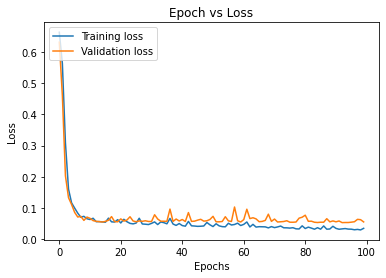

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss','Validation loss'],loc='upper left')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Epoch vs Loss')

In [13]:
results = model.evaluate(test_data, test_labels, batch_size=128)
print("test loss, test acc:", results)

8/8 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9910
test loss, test acc: [0.034901827573776245, 0.9909999966621399]


### 2 Hidden layer Neural Network

In [14]:
model=tf.keras.Sequential([
    tf.keras.Input(shape=(140,)),
    tf.keras.layers.Dense(32,activation='tanh'),
    tf.keras.layers.Dense(8,activation='tanh'),
    tf.keras.layers.Dense(1,activation='sigmoid')])
model.summary()
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                4512      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 4,785
Trainable params: 4,785
Non-trainable params: 0
_________________________________________________________________


In [15]:
history=model.fit(train_data,train_labels,batch_size=64,epochs=100,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 0s 7ms/step - loss: 0.6520 - accuracy: 0.6651 - val_loss: 0.5542 - val_accuracy: 0.7700
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.9237 - val_loss: 0.3444 - val_accuracy: 0.9237
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2475 - accuracy: 0.9534 - val_loss: 0.1955 - val_accuracy: 0.9450
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1633 - accuracy: 0.9568 - val_loss: 0.1405 - val_accuracy: 0.9575
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1251 - accuracy: 0.9653 - val_loss: 0.1103 - val_accuracy: 0.9663
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.1048 - accuracy: 0.9687 - val_loss: 0.0921 - val_accuracy: 0.9725
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0917 - accuracy: 0.9725 - val_loss: 0.0801 - val_accuracy: 0.9762
Epoch 8/100
5

Text(0.5, 1.0, 'Epoch vs Accuracy')

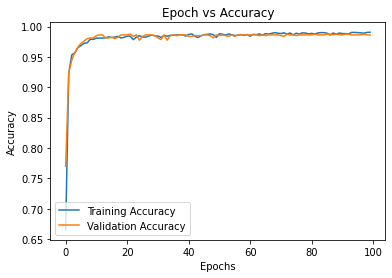

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy','Validation Accuracy'],loc='lower left')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Epoch vs Accuracy')

Text(0.5, 1.0, 'Epoch vs LOss')

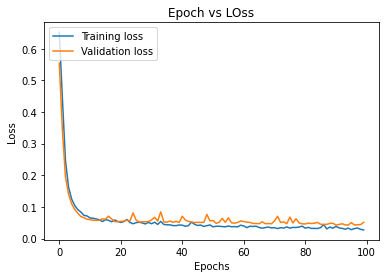

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss','Validation loss'],loc='upper left')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Epoch vs LOss')

In [18]:
results = model.evaluate(test_data, test_labels, batch_size=128)
print("test loss, test acc:", results)

8/8 [==============================] - 0s 4ms/step - loss: 0.0383 - accuracy: 0.9860
test loss, test acc: [0.038342952728271484, 0.9860000014305115]


## Autoencoder 
### Simple Auto Encoder

In [19]:
input_layer=tf.keras.Input(shape=(140,))
encoder_1=tf.keras.layers.Dense(128,activation='relu',)(input_layer)
encoder_2=tf.keras.layers.Dense(64,activation='relu',)(encoder_1)
encoder_3=tf.keras.layers.Dense(32,activation='relu',)(encoder_2)
encoder_4=tf.keras.layers.Dense(16,activation='relu',)(encoder_3)
decoder_1=tf.keras.layers.Dense(16,activation='relu',)(encoder_4)
decoder_2=tf.keras.layers.Dense(32,activation='relu',)(decoder_1)
decoder_3=tf.keras.layers.Dense(64,activation='relu',)(decoder_2)
decoder_4=tf.keras.layers.Dense(128,activation='relu',)(decoder_3)
output_layer=tf.keras.layers.Dense(140,activation='sigmoid')(decoder_4)
autoencoder=tf.keras.Model(input_layer,output_layer)
autoencoder.compile(optimizer='Adam',loss='mse',metrics=['accuracy'])
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 140)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               18048     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_13 (Dense)             (None, 32)               

In [20]:
history=autoencoder.fit(train_data,train_data,epochs=100,batch_size=32,validation_split=0.2)

Epoch 1/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0029 - accuracy: 0.0422 - val_loss: 0.0016 - val_accuracy: 0.0500
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 0.0647 - val_loss: 0.0011 - val_accuracy: 0.0688
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 0.0866 - val_loss: 0.0011 - val_accuracy: 0.0938
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 9.2469e-04 - accuracy: 0.1113 - val_loss: 9.6137e-04 - val_accuracy: 0.1412
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 8.6108e-04 - accuracy: 0.1220 - val_loss: 9.3014e-04 - val_accuracy: 0.1063
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 8.3290e-04 - accuracy: 0.1357 - val_loss: 9.1744e-04 - val_accuracy: 0.1063
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 8.1233e-04 - accuracy: 0.1348 - val_loss: 8

Text(0.5, 1.0, 'Epoch vs Accuracy')

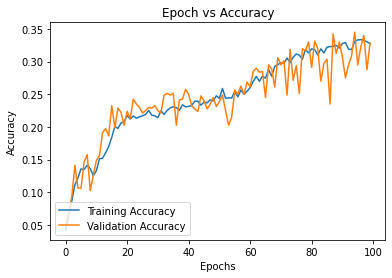

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy','Validation Accuracy'],loc='lower left')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Epoch vs Accuracy')

Text(0.5, 1.0, 'Epoch vs Loss')

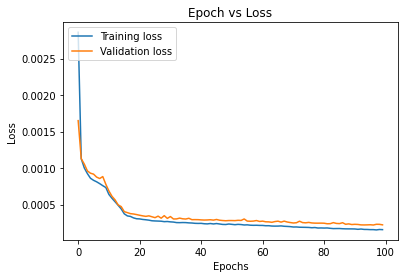

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss','Validation loss'],loc='upper left')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Epoch vs Loss')

### Auto encoder Classifier

In [23]:
model=tf.keras.Sequential([
    autoencoder.layers[0],
    autoencoder.layers[1],
    autoencoder.layers[2],
    autoencoder.layers[3],
    autoencoder.layers[4],
    tf.keras.layers.Dense(1,activation="sigmoid")])
model.summary()
model.compile(optimizer="Adam",loss="mse",metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               18048     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 28,929
Trainable params: 28,929
Non-trainable params: 0
_________________________________________________________________


In [24]:
history=model.fit(train_data,train_labels,batch_size=64,epochs=100,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 0s 7ms/step - loss: 0.1170 - accuracy: 0.9212 - val_loss: 0.0453 - val_accuracy: 0.9525
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9637 - val_loss: 0.0268 - val_accuracy: 0.9700
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9684 - val_loss: 0.0191 - val_accuracy: 0.9787
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9778 - val_loss: 0.0216 - val_accuracy: 0.9775
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9800 - val_loss: 0.0141 - val_accuracy: 0.9875
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9816 - val_loss: 0.0140 - val_accuracy: 0.9850
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9800 - val_loss: 0.0144 - val_accuracy: 0.9837
Epoch 8/100
5

Text(0.5, 1.0, 'Epoch vs Accuracy')

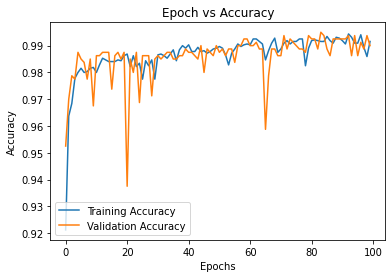

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy','Validation Accuracy'],loc='lower left')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Epoch vs Accuracy')

Text(0.5, 1.0, 'Epoch vs Accuracy')

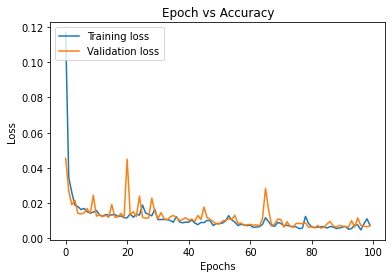

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss','Validation loss'],loc='upper left')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Epoch vs Accuracy')

In [27]:
results = model.evaluate(test_data, test_labels, batch_size=128)
print("test loss, test acc:", results)

8/8 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9900
test loss, test acc: [0.006727193016558886, 0.9900000095367432]


## Convolution Neural Network
Both traing and testing data need to be transformed so it can be used by the model

In [28]:
X=np.expand_dims(train_data,2)
model=tf.keras.Sequential([
    tf.keras.layers.Conv1D(10,16,strides=4,activation="relu",input_shape=(X.shape[1],X.shape[2])),
    tf.keras.layers.MaxPool1D(pool_size=4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")])
model.summary()
model.compile(optimizer="Adam",loss="mse",metrics=["accuracy"])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 32, 10)            170       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 10)             0         
_________________________________________________________________
flatten (Flatten)            (None, 80)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 81        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [29]:
history=model.fit(X,train_labels,batch_size=64,epochs=100,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 0s 9ms/step - loss: 0.2397 - accuracy: 0.5888 - val_loss: 0.2358 - val_accuracy: 0.5950
Epoch 2/100
50/50 [==============================] - 0s 6ms/step - loss: 0.2345 - accuracy: 0.5888 - val_loss: 0.2310 - val_accuracy: 0.5950
Epoch 3/100
50/50 [==============================] - 0s 5ms/step - loss: 0.2285 - accuracy: 0.5888 - val_loss: 0.2237 - val_accuracy: 0.5950
Epoch 4/100
50/50 [==============================] - 0s 5ms/step - loss: 0.2199 - accuracy: 0.5888 - val_loss: 0.2139 - val_accuracy: 0.5950
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 0.2084 - accuracy: 0.6069 - val_loss: 0.2010 - val_accuracy: 0.6313
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1938 - accuracy: 0.6986 - val_loss: 0.1851 - val_accuracy: 0.8112
Epoch 7/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1758 - accuracy: 0.8959 - val_loss: 0.1670 - val_accuracy: 0.8913
Epoch 8/100
5

Text(0.5, 1.0, 'Epoch vs Accuracy')

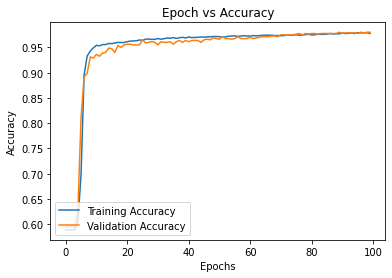

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy','Validation Accuracy'],loc='lower left')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Epoch vs Accuracy')

Text(0.5, 1.0, 'Epoch vs Accuracy')

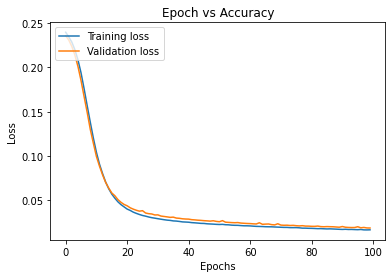

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss','Validation loss'],loc='upper left')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Epoch vs Accuracy')

In [32]:
X_test=np.expand_dims(test_data,2)

In [33]:
results = model.evaluate(X_test, test_labels, batch_size=128)
print("test loss, test acc:", results)

8/8 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9830
test loss, test acc: [0.014086397364735603, 0.9829999804496765]


## LSTM

In [34]:
model=tf.keras.Sequential([
    tf.keras.Input(shape=(X.shape[1],X.shape[2])),
    tf.keras.layers.LSTM(5,activation="relu"),
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.summary()
model.compile(optimizer="Adam",loss="mse",metrics=["accuracy"])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 48        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [35]:
history=model.fit(X,train_labels,batch_size=64,epochs=100,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 4s 80ms/step - loss: 0.2514 - accuracy: 0.4869 - val_loss: 0.2472 - val_accuracy: 0.5950
Epoch 2/100
50/50 [==============================] - 4s 74ms/step - loss: 0.2442 - accuracy: 0.5888 - val_loss: 0.2398 - val_accuracy: 0.5950
Epoch 3/100
50/50 [==============================] - 3s 65ms/step - loss: 0.2338 - accuracy: 0.5888 - val_loss: 0.2270 - val_accuracy: 0.5950
Epoch 4/100
50/50 [==============================] - 4s 73ms/step - loss: 0.2251 - accuracy: 0.5888 - val_loss: 0.2211 - val_accuracy: 0.5950
Epoch 5/100
50/50 [==============================] - 3s 64ms/step - loss: 0.2748 - accuracy: 0.5869 - val_loss: 0.4050 - val_accuracy: 0.5950
Epoch 6/100
50/50 [==============================] - 3s 61ms/step - loss: 0.4112 - accuracy: 0.5888 - val_loss: 0.4050 - val_accuracy: 0.5950
Epoch 7/100
50/50 [==============================] - 3s 68ms/step - loss: 0.4112 - accuracy: 0.5888 - val_loss: 0.4050 - val_accuracy: 0.5950
Epoch 

Text(0.5, 1.0, 'Epoch vs Accuracy')

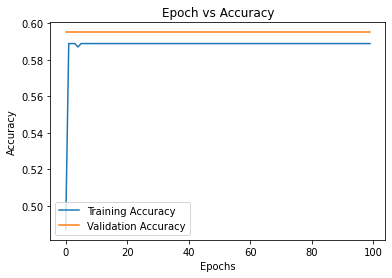

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy','Validation Accuracy'],loc='lower left')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Epoch vs Accuracy')

Text(0.5, 1.0, 'Epoch vs Loss')

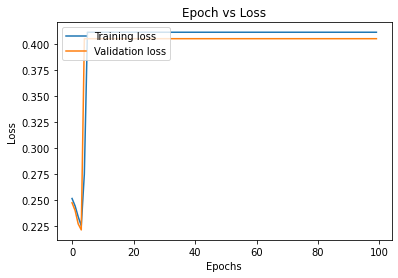

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss','Validation loss'],loc='upper left')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Epoch vs Loss')

In [38]:
results = model.evaluate(X_test, test_labels, batch_size=128)
print("test loss, test acc:", results)

8/8 [==============================] - 0s 19ms/step - loss: 0.4400 - accuracy: 0.5600
test loss, test acc: [0.4399999976158142, 0.5600000023841858]
